<a href="https://colab.research.google.com/github/Saadiyah04/weatherwise_saadiyah/blob/main/Weatherwise_Saadiyah_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌦️ WeatherWise: Intelligent Weather Assistant
🔍 You can do the following:
- Type a city and number of days (1–5) to get forecast
- Ask: 'Will it rain today in Port Louis?' or 'Show me temp tomorrow in Curepipe'
- Use visual buttons: Temperature 📈 or Precipitation ☔
- Type 'Exit' anytime to leave

🔸 MAIN MENU
Please select one of the following:
1. ☁️ Fetch Weather (by City)
2. 💬 Ask AI about Weather
3. 📈 Show Temperature Chart
4. ☔ Show Precipitation Chart
5. ❌ Exit
1
📍 Enter city name: Savanne
📆 Enter number of forecast days (1–5): 5
🌤️ Savanne now: 24°C, Partly cloudy

🔸 MAIN MENU
Please select one of the following:
1. ☁️ Fetch Weather (by City)
2. 💬 Ask AI about Weather
3. 📈 Show Temperature Chart
4. ☔ Show Precipitation Chart
5. ❌ Exit
2
🤖 Ask anything about the weather: When will it rain?
☁️ Caroline - Tomorrow rain chance: 0%

🔸 MAIN MENU
Please select one of the following:
1. ☁️ Fetch Weather (by City)
2. 💬 Ask AI about Weather
3. 📈 Show Temperature Chart
4. ☔ Show Precipitation 

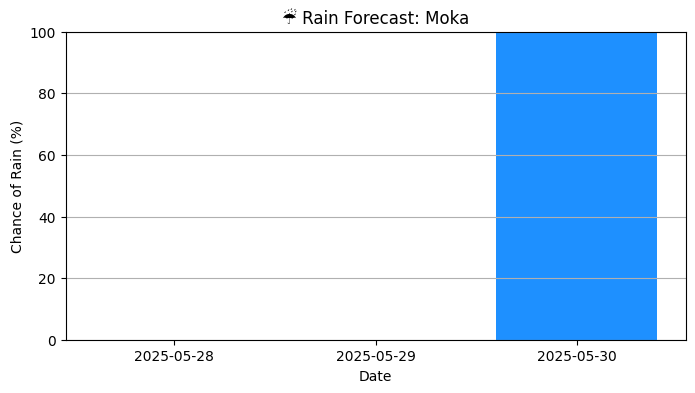


🔸 MAIN MENU
Please select one of the following:
1. ☁️ Fetch Weather (by City)
2. 💬 Ask AI about Weather
3. 📈 Show Temperature Chart
4. ☔ Show Precipitation Chart
5. ❌ Exit
3
📍 Enter city: Moka


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


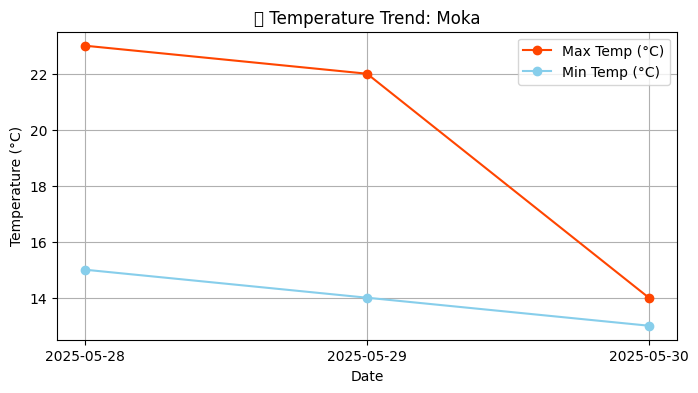


🔸 MAIN MENU
Please select one of the following:
1. ☁️ Fetch Weather (by City)
2. 💬 Ask AI about Weather
3. 📈 Show Temperature Chart
4. ☔ Show Precipitation Chart
5. ❌ Exit
5
👋 Goodbye! Stay weather-wise with WeatherWise!


In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
import os

BASE_URL = "https://wttr.in"

def welcome_message():
    print("="*70)
    print("🌦️ WeatherWise: Intelligent Weather Assistant")
    print("="*70)
    print("🔍 You can do the following:")
    print("- Type a city and number of days (1–5) to get forecast")
    print("- Ask: 'Will it rain today in Port Louis?' or 'Show me temp tomorrow in Curepipe'")
    print("- Use visual buttons: Temperature 📈 or Precipitation ☔")
    print("- Type 'Exit' anytime to leave")
    print("="*70)

def get_weather_data(location, forecast_days=5):
    try:
        url = f"{BASE_URL}/{location}?format=j1"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()

        if 'weather' not in data or 'current_condition' not in data:
            print("⚠️ AI Notice: Incomplete data received. Try another city.")
            return None

        forecast = data.get('weather', [])[:forecast_days]
        current = data.get('current_condition', [{}])[0]

        return {
            'location': location,
            'current': current,
            'forecast': forecast
        }

    except Exception as e:
        print(f"🚨 Could not fetch data for {location}. Error: {e}")
        return None

def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day['date'] for day in weather_data['forecast']]
    max_temps = [int(day['maxtempC']) for day in weather_data['forecast']]
    min_temps = [int(day['mintempC']) for day in weather_data['forecast']]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, max_temps, label='Max Temp (°C)', marker='o', color='orangered')
    plt.plot(dates, min_temps, label='Min Temp (°C)', marker='o', color='skyblue')
    plt.title(f"📈 Temperature Trend: {weather_data['location'].title()}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)

    if output_type == 'display':
        plt.show()
    else:
        return plt.gcf()

def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = [day['date'] for day in weather_data['forecast']]
    rain_chances = [int(day['hourly'][4]['chanceofrain']) for day in weather_data['forecast']]

    plt.figure(figsize=(8, 4))
    plt.bar(dates, rain_chances, color='dodgerblue')
    plt.title(f"☔ Rain Forecast: {weather_data['location'].title()}")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.ylim(0, 100)
    plt.grid(True, axis='y')

    if output_type == 'display':
        plt.show()
    else:
        return plt.gcf()

def parse_weather_question(question):
    keywords = {
        'temperature': ['temperature', 'hot', 'cold', 'warm', 'cool'],
        'rain': ['rain', 'precipitation', 'wet', 'drizzle'],
        'today': ['today', 'now', 'currently'],
        'tomorrow': ['tomorrow', 'next day', 'following day']
    }

    weather_type = 'temperature' if any(word in question.lower() for word in keywords['temperature']) else 'rain'
    time_period = 'today' if any(word in question.lower() for word in keywords['today']) else 'tomorrow'
    location = question.lower().split(' in ')[-1].strip().title() if ' in ' in question.lower() else 'Caroline'

    return {
        'type': weather_type,
        'time': time_period,
        'location': location
    }

def generate_weather_response(parsed_question, weather_data):
    forecast = weather_data['forecast'][0] if parsed_question['time'] == 'today' else weather_data['forecast'][1]

    if parsed_question['type'] == 'temperature':
        max_temp = forecast['maxtempC']
        min_temp = forecast['mintempC']
        return (f"🌡️ {parsed_question['location']} - {parsed_question['time'].capitalize()} forecast:\n"
                f"Temperature: {min_temp}°C – {max_temp}°C")
    else:
        rain = forecast['hourly'][4]['chanceofrain']
        return (f"☁️ {parsed_question['location']} - {parsed_question['time'].capitalize()} rain chance: {rain}%")

def main_menu():
    welcome_message()

    while True:
        print("\n🔸 MAIN MENU")
        choice = pyip.inputMenu([
            '☁️ Fetch Weather (by City)',
            '💬 Ask AI about Weather',
            '📈 Show Temperature Chart',
            '☔ Show Precipitation Chart',
            '❌ Exit'
        ], numbered=True)

        if choice == '☁️ Fetch Weather (by City)':
            city = pyip.inputStr("📍 Enter city name: ")
            days = pyip.inputInt("📆 Enter number of forecast days (1–5): ", min=1, max=5)
            data = get_weather_data(city, days)
            if data:
                print(f"🌤️ {city.title()} now: {data['current']['temp_C']}°C, {data['current']['weatherDesc'][0]['value']}")

        elif choice == '💬 Ask AI about Weather':
            question = pyip.inputStr("🤖 Ask anything about the weather: ")
            parsed = parse_weather_question(question)
            data = get_weather_data(parsed['location'])
            if data:
                print(generate_weather_response(parsed, data))

        elif choice == '📈 Show Temperature Chart':
            city = pyip.inputStr("📍 Enter city: ")
            data = get_weather_data(city)
            if data:
                create_temperature_visualisation(data)

        elif choice == '☔ Show Precipitation Chart':
            city = pyip.inputStr("📍 Enter city: ")
            data = get_weather_data(city)
            if data:
                create_precipitation_visualisation(data)

        elif choice == '❌ Exit':
            print("👋 Goodbye! Stay weather-wise with WeatherWise!")
            break

if __name__ == '__main__':
    main_menu()

In [ ]:
!pip install pyinputplus

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=08e1abd5255c60ebc7152f0921e33cec925f644c90b681e679b5e1521c65db0f
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=bd3f2dc0a9af21914a60fd4c88adc0e271e7727f849e1688455f368a9519e410
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask